<h2 style='color:blue' align='center'>Implementation of Mini Batch Gradient Descent in Python</h2>

#### We will use very simple home prices data set to implement Mini Batch Gradient Descent in python. 

1. Batch Gradient Descent: uses *all* training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties

2. Stochastic Gradient Descent: we randomly pick *one* training sample, perform forward pass, compute the error and immidiately adjust weights

3. Mini Batch Gradient Descent: we use a batch of *m* samples where 0 < m < n (where n is total number of training samples)


In [1]:
# loading all required modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

##### Load the dataset in pandas dataframe

In [2]:
# loading the dataset on to a DataFrame
df = pd.read_csv(".\Dataset\homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
16,1180,3,48.0
12,1000,2,38.0
10,1800,3,82.0
2,1440,3,62.0
1,2600,4,120.0


##### Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [3]:
# scaling will improve the performance of the model
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

##### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [5]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

##### Gradient descent allows you to find weights (w1, w2) and bias in following linear equation for housing price prediction

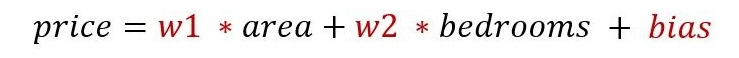

##### Now it is the time to implement Mini Batch Gradient Descent. 

<h3 style='color:purple'>(1) Mini Batch Gradient Descent Implementation</h3>

In [15]:
np.random.permutation(20)   # generating random numbers between 1 to 20

array([ 8,  5, 11,  4, 17, 16,  7,  0, 14, 18,  9, 15, 19,  1, 13, 10,  6,
        3, 12,  2])

In [14]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area and bedrooms)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if (batch_size > total_samples): # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples / batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0, total_samples, batch_size):
            Xj = X_tmp[j: j + batch_size]
            yj = y_tmp[j: j + batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2 / len(Xj)) * (Xj.T.dot(yj - y_predicted))
            b_grad = -(2 / len(Xj)) * np.sum(yj - y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj - y_predicted)) # MSE (Mean Squared Error)
        
        if (i % 10 == 0):
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71009334, 0.67821345]), -0.23321452608545826, 0.013787232451700882)

In [9]:
#(array([0.71013768, 0.67821345]), -0.23321452608545826, 0.0068641890429808105)

__Check price equation above. In that equation we were trying to find values of w1, w2 and bias. Here we got these values for each of them,__

w1 = 0.71013768

w2 = 0.67807763

bias = -0.23034857438407427

###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

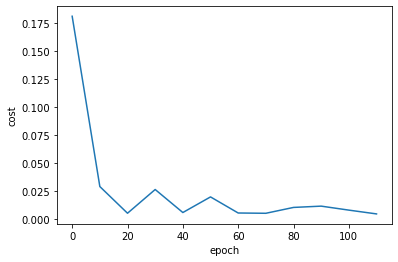

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

###### Lets do some predictions now. 

In [11]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to rescale it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

92.27895270278336

In [12]:
predict(1000, 2, w, b)

29.979645864451083

In [13]:
predict(1500, 3, w, b)

69.39383267467896